In [30]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Ames = pd.read_csv('AmesHousing.csv')

In [4]:
rows, columns = Ames.shape

print(f"The dataset made of {rows} properties described by {columns} features.")

The dataset made of 2930 properties described by 82 features.


In [5]:
# Determine the data type for each feature
data_types = Ames.dtypes
 
# Tally the total by data type
type_counts = data_types.value_counts()
 
print(type_counts)

object     43
int64      28
float64    11
Name: count, dtype: int64


In [6]:
# Determine the data type for each feature
data_types = Ames.dtypes
 
# View a few datatypes from the dataset (first and last 5 features)
print(data_types)

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object


In [8]:
# Create a DataFrame with various types of missing values
df = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5],
    'B': ['a', 'b', None, 'd', 'e'],
    'C': [np.nan, np.nan, np.nan, np.nan, np.nan],
    'D': [1, 2, 3, 4, 5]
})

# Use isnull() to identify missing values
missing_data = df.isnull().sum()

print(df)
print()
print(missing_data)

     A     B   C  D
0  1.0     a NaN  1
1  2.0     b NaN  2
2  NaN  None NaN  3
3  4.0     d NaN  4
4  5.0     e NaN  5

A    1
B    1
C    5
D    0
dtype: int64


In [16]:
# Calculating the percentage of missing values for each column
missing_data = Ames.isnull().sum()
missing_percentage = (missing_data / len(Ames)) * 100

# Combining the counts and percentages into a DataFrame for better visualization
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
 
# Sorting the DataFrame by the percentage of missing values in descending order
missing_info = missing_info.sort_values(by='Percentage', ascending=False)
 
# Display columns with missing values
print(missing_info[missing_info['Missing Values'] > 0])

                Missing Values  Percentage
Pool QC                   2917   99.556314
Misc Feature              2824   96.382253
Alley                     2732   93.242321
Fence                     2358   80.477816
Mas Vnr Type              1775   60.580205
Fireplace Qu              1422   48.532423
Lot Frontage               490   16.723549
Garage Cond                159    5.426621
Garage Finish              159    5.426621
Garage Yr Blt              159    5.426621
Garage Qual                159    5.426621
Garage Type                157    5.358362
Bsmt Exposure               83    2.832765
BsmtFin Type 2              81    2.764505
Bsmt Qual                   80    2.730375
Bsmt Cond                   80    2.730375
BsmtFin Type 1              80    2.730375
Mas Vnr Area                23    0.784983
Bsmt Full Bath               2    0.068259
Bsmt Half Bath               2    0.068259
BsmtFin SF 1                 1    0.034130
Garage Cars                  1    0.034130
Electrical 

In [15]:
(missing_data / len(Ames)) * 100

Order              0.000000
PID                0.000000
MS SubClass        0.000000
MS Zoning          0.000000
Lot Frontage      16.723549
                    ...    
Mo Sold            0.000000
Yr Sold            0.000000
Sale Type          0.000000
Sale Condition     0.000000
SalePrice          0.000000
Length: 82, dtype: float64

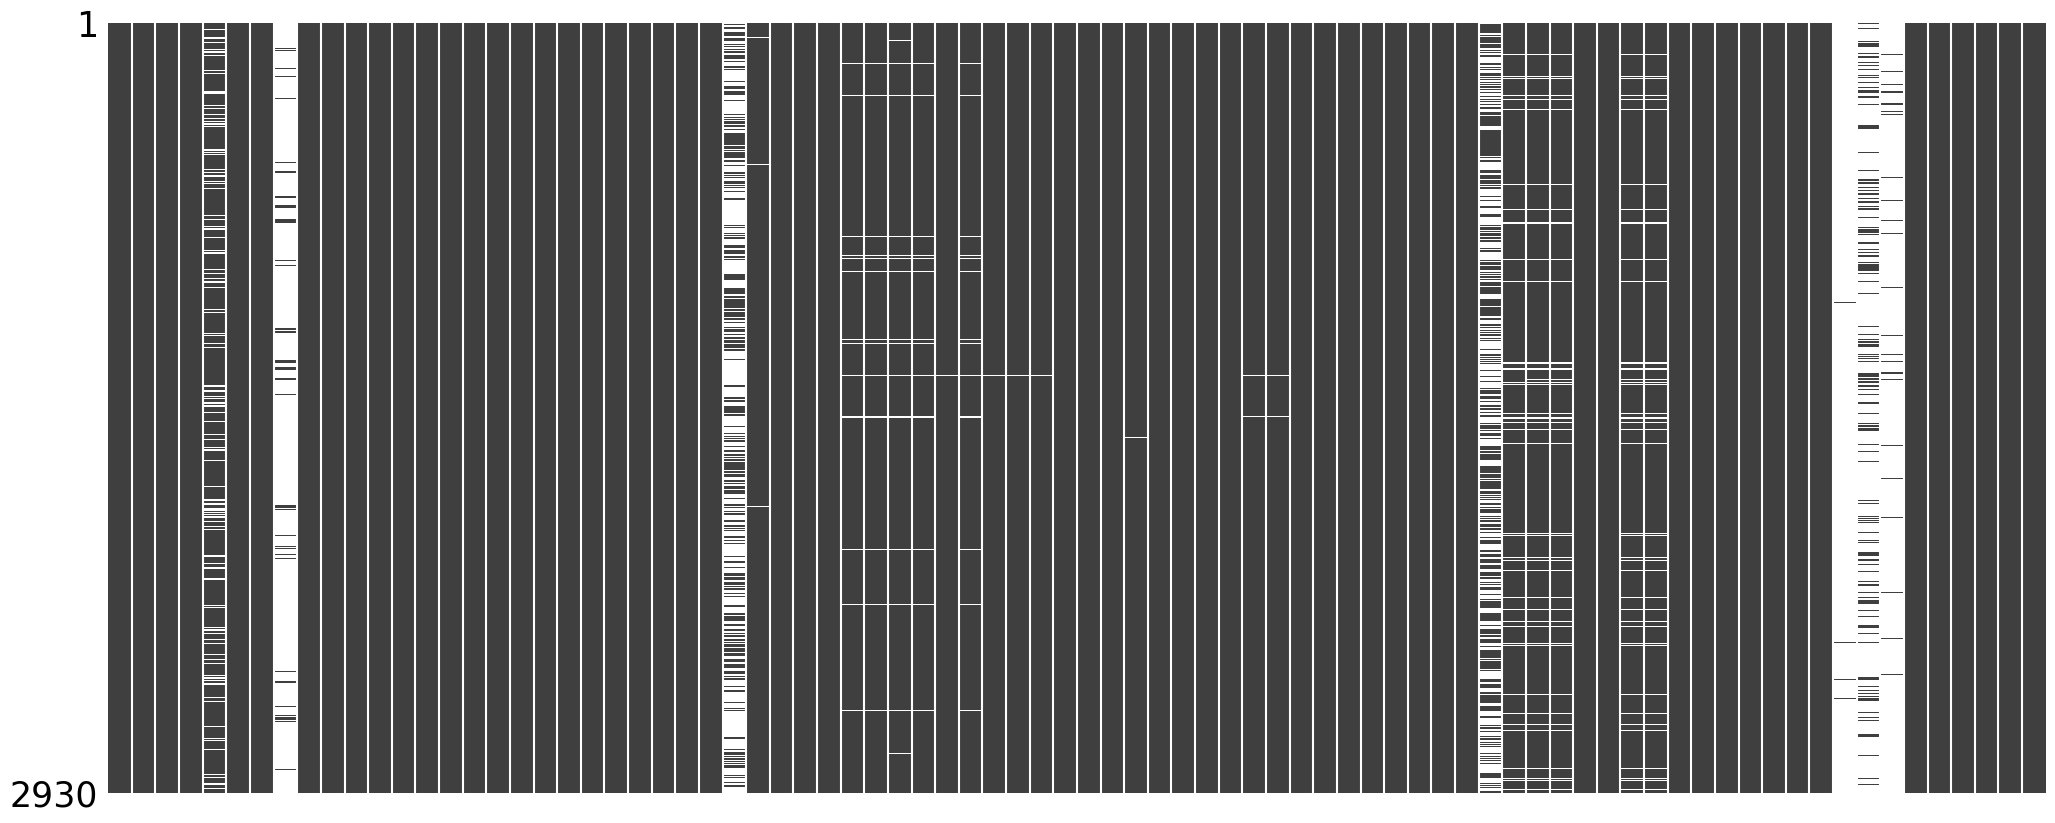

In [20]:
msno.matrix(Ames, sparkline=False, fontsize=20)
plt.show()

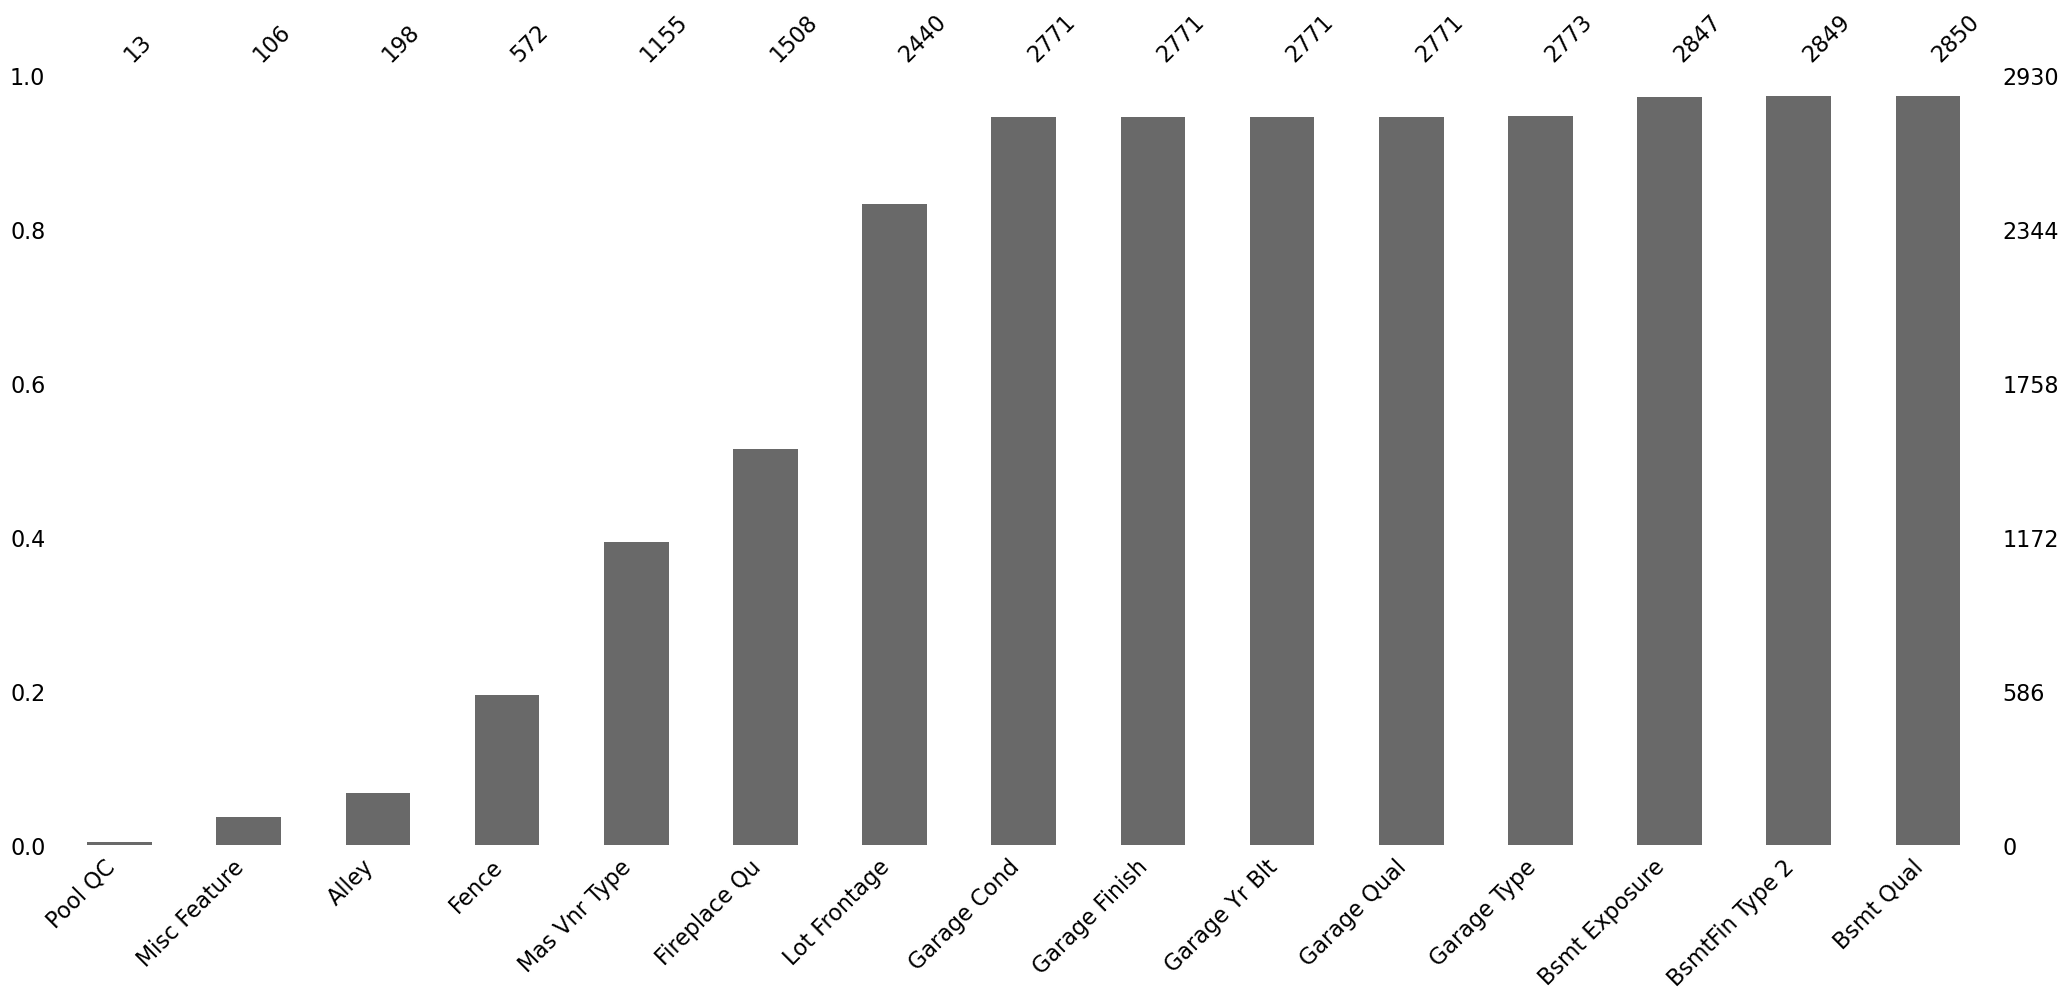

In [38]:
missing_data = Ames.isnull().sum()
missing_percentage = (missing_data / len(Ames)) * 100
 
# Combining the counts and percentages into a DataFrame for better visualization
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
 
# Sort the DataFrame columns by the percentage of missing values
sorted_df = Ames[missing_info.sort_values(by='Percentage', ascending=False).index]
 
# Select the top 15 columns with the most missing values
top_15_missing = sorted_df.iloc[:, :15]
 
#Visual with missingno
msno.bar(top_15_missing)
plt.show()

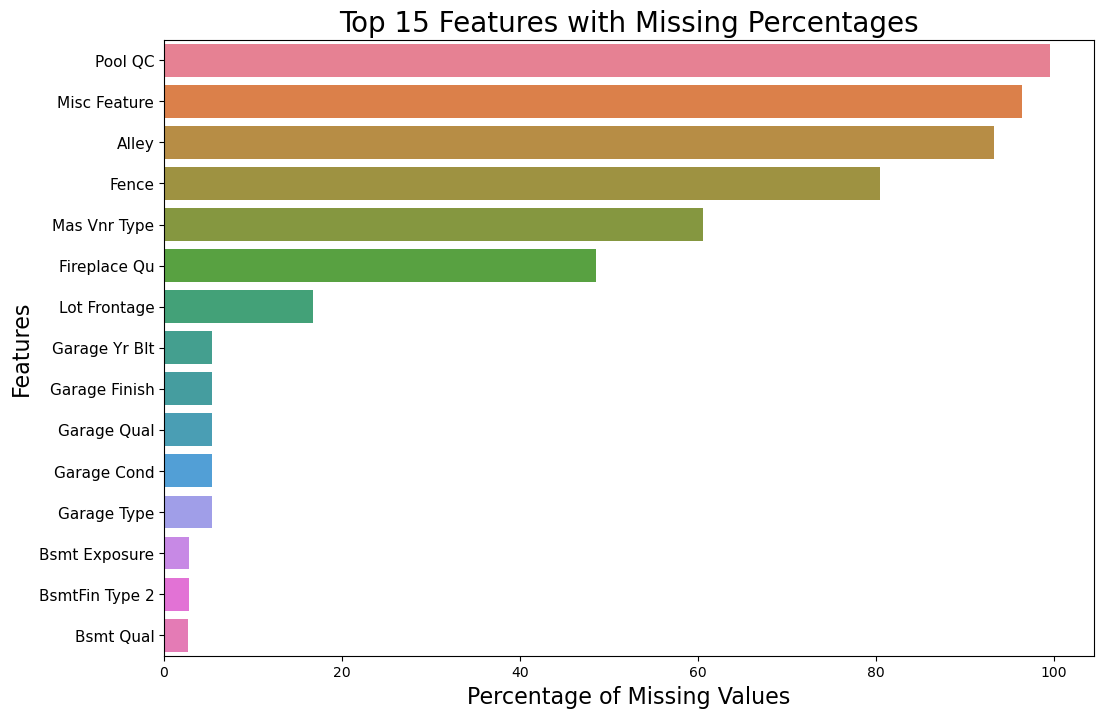

In [39]:
# Filter to show only the top 15 columns with the most missing values
top_15_missing_info = missing_info.nlargest(15, 'Percentage')

# Create the horizontal bar plot using seaborn and specify 'y' as 'hue'
plt.figure(figsize=(12, 8))
sns.barplot(x='Percentage', y=top_15_missing_info.index, data=top_15_missing_info, orient='h', hue=top_15_missing_info.index, legend=False)
plt.title('Top 15 Features with Missing Percentages', fontsize=20)
plt.xlabel('Percentage of Missing Values', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.yticks(fontsize=11)
plt.show()
